In [2]:
import pandas as pd

# Load the datasets
try:
    df_eu = pd.read_csv("dtest_all_predictions_NE.csv")
    df_usa = pd.read_csv("dtest_all_predictions_USA.csv")
except FileNotFoundError:
    print("Error: One or both CSV files not found. Please make sure they are in the same directory as the script.")
    exit()


# Rename the 'dif' columns for clarity before merging
df_eu.rename(columns={'dif': 'difEU'}, inplace=True)
df_usa.rename(columns={'dif': 'difUSA'}, inplace=True)


# Merge the datasets based on 'comp_id' and 'year'
merged_df = pd.merge(df_eu, df_usa, on=['comp_id', 'year', 'country_short'], how='outer')

# Select the desired columns
final_df = merged_df[['comp_id', 'year', 'country_short', 'difEU', 'difUSA']]

# Save the merged data to a new CSV file
final_df.to_csv("merged_predictions.csv", index=False)


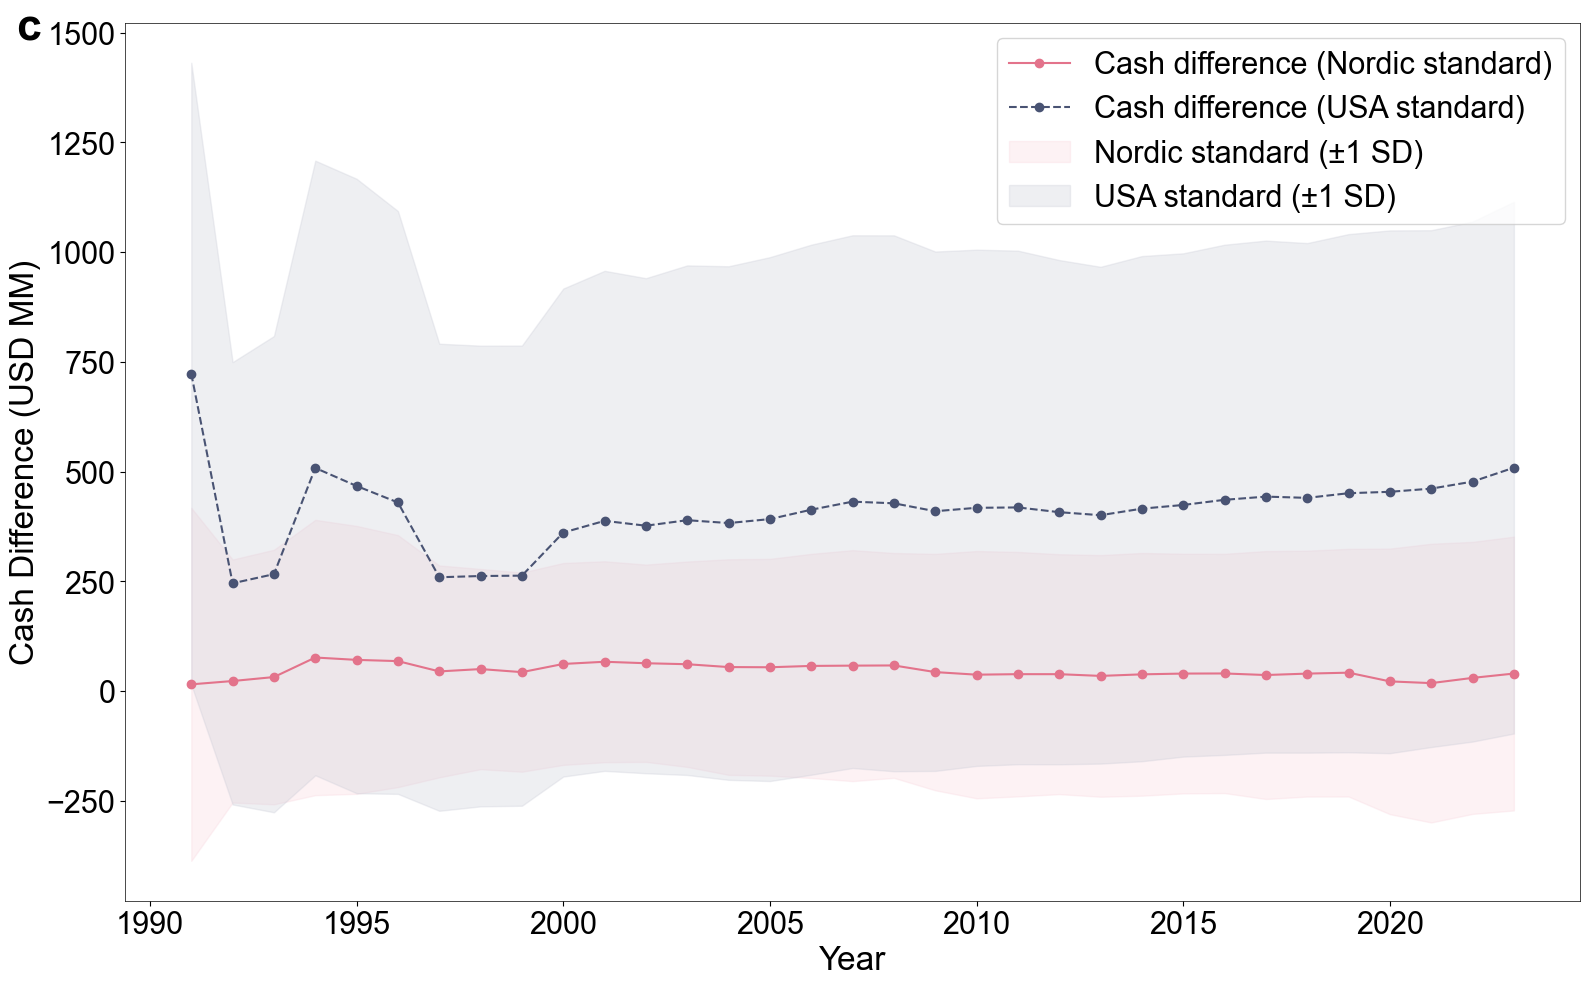

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
try:
    merged_df = pd.read_csv("merged_predictions.csv")
except FileNotFoundError:
    print("Error: merged_predictions.csv not found. Please make sure it is in the same directory as the script.")
    exit()

# Group data by year and calculate the mean and standard deviation of difEU and difUSA for each year
yearly_data = merged_df.groupby('year').agg(
    difEU_mean=('difEU', 'mean'),
    difEU_std=('difEU', 'std'),
    difUSA_mean=('difUSA', 'mean'),
    difUSA_std=('difUSA', 'std')
).reset_index()

# Set font to Times New Roman globally
plt.rcParams['font.family'] = 'Arial'

# Plot the data
plt.figure(figsize=(16, 10))

# Plot the mean lines
plt.plot(yearly_data['year'], yearly_data['difEU_mean'], label='Cash difference (Nordic standard)',
         marker='o', linestyle='-', color='#E3738B')
plt.plot(yearly_data['year'], yearly_data['difUSA_mean'], label='Cash difference (USA standard)',
         marker='o', linestyle='--', color='#495373')

# Add confidence intervals using fill_between
plt.fill_between(yearly_data['year'],
                 yearly_data['difEU_mean'] - yearly_data['difEU_std'],
                 yearly_data['difEU_mean'] + yearly_data['difEU_std'],
                 color='#F9D5DD', alpha=0.3, label='Nordic standard (±1 SD)')  # Shaded area for difEU

plt.fill_between(yearly_data['year'],
                 yearly_data['difUSA_mean'] - yearly_data['difUSA_std'],
                 yearly_data['difUSA_mean'] + yearly_data['difUSA_std'],
                 color='#C9CBD6', alpha=0.3, label='USA standard (±1 SD)')  # Shaded area for difUSA

# Customize the plot
# Customize the plot title: bold and left-aligned
#plt.title("(C) Yearly trends of cash difference", fontsize=14, fontweight='bold', loc='left')
# Add a custom title aligned with the Y-axis title
plt.text(
    -0.075,  # X-coordinate (negative value to place it outside the plot area)
    0.97,  # Y-coordinate (slightly above the plot area)
    "c",  # Title text
    fontsize=32, 
    fontweight='bold', 
    ha='left',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    transform=plt.gca().transAxes  # Use axes coordinates for positioning
)

plt.xlabel("Year", fontsize=24)
plt.ylabel("Cash Difference (USD MM)", fontsize=24)
plt.legend(fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Remove grid lines
plt.grid(False)

# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig("yearly_trends_with_confidence_intervals.png", dpi=400)  # Save as a 300 DPI PNG file

# Show the plot
plt.show()

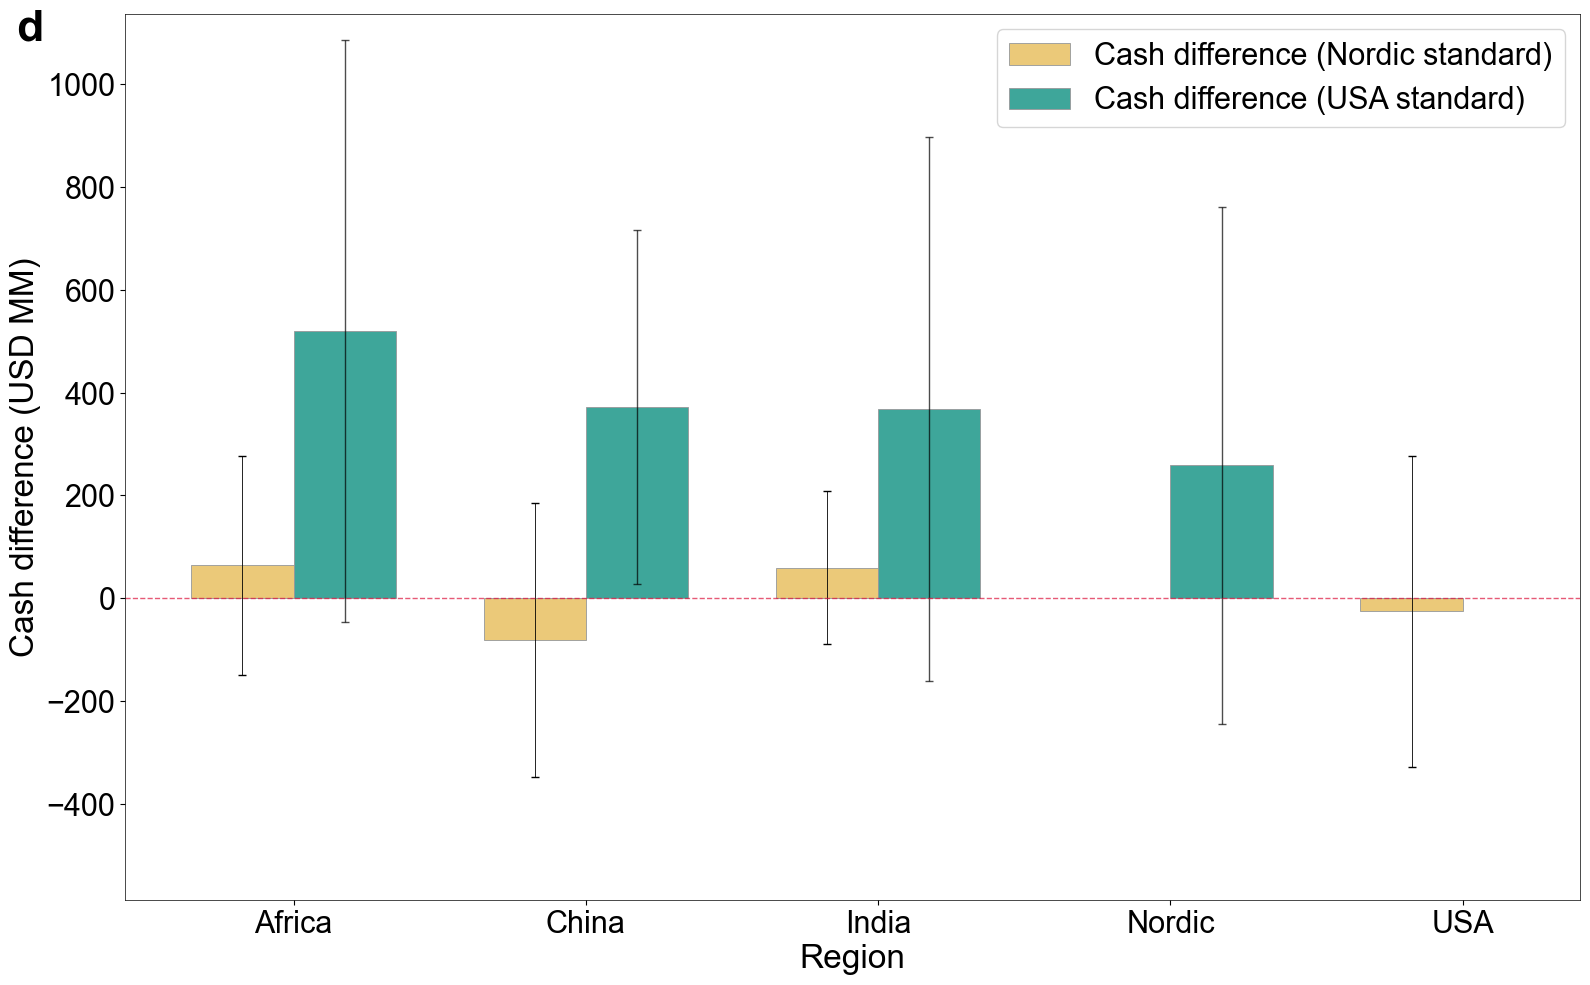

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set global parameters for matplotlib
plt.rcParams['axes.edgecolor'] = 'black'  # Set axis border color to black
plt.rcParams['axes.linewidth'] = 0.5     # Set axis border width

# Load the merged dataset
try:
    merged_df = pd.read_csv("merged_predictions.csv")
except FileNotFoundError:
    print("Error: merged_predictions.csv not found. Please make sure it is in the same directory as the script.")
    exit()

# Define country groups and their abbreviations
country_groups = {
    "Africa": ["DZA", "BEN", "BWA", "BFA", "EGY", "LBY", "MWI", "MLI", "MUS", "MAR", "ZAF", "SDN", "SWZ", "TZA", "GAB", "GMB", "GHA", "CIV", "KEN", "NAM", "NER", "NGA", "RWA", "SEN", "TGO", "TUN", "UGA", "ZMB", "ZWE"],
    "India": ["IND"],
    "China": ["CHN"],
    "Nordic": ["DNK", "FIN", "ISL", "NOR", "SWE"],
    "USA": ["USA"]
}

# Add a new column for region based on country_short
def assign_region(country):
    for region, countries in country_groups.items():
        if country in countries:
            return region
    return None

merged_df['region'] = merged_df['country_short'].apply(assign_region)

# Filter out rows with no region assigned
merged_df = merged_df[merged_df['region'].notna()]

# Group by region and calculate the mean and standard deviation of difEU and difUSA
region_data = merged_df.groupby('region').agg(
    difEU_mean=('difEU', 'mean'),
    difEU_std=('difEU', 'std'),
    difUSA_mean=('difUSA', 'mean'),
    difUSA_std=('difUSA', 'std')
).reset_index()

# Set font to Arial globally
plt.rcParams['font.family'] = 'Arial'

# Plot the data
bar_width = 0.35
x = np.arange(len(region_data['region']))  # Use numpy for better handling of x positions

plt.figure(figsize=(16, 10))

# Plot bars for difEU
plt.bar(x, region_data['difEU_mean'], width=bar_width, label='Cash difference (Nordic standard)', 
        color='#E9C46A', alpha=0.9, edgecolor='#989A9C', linewidth=0.7)

# Add error bars for difEU
plt.errorbar(x, region_data['difEU_mean'], yerr=region_data['difEU_std'], fmt='none', 
             ecolor='black', capsize=3, capthick=1, linewidth=0.6)

# Plot bars for difUSA
plt.bar(x + bar_width, region_data['difUSA_mean'], width=bar_width, label='Cash difference (USA standard)', 
        color='#299D8F', alpha=0.9, edgecolor='#989A9C', linewidth=0.7)

# Add error bars for difUSA
plt.errorbar(x + bar_width, region_data['difUSA_mean'], yerr=region_data['difUSA_std'], fmt='none', 
             ecolor='black', capsize=3, capthick=1, linewidth=1,alpha=0.7)

# Add a dark red dashed line at Y=0
plt.axhline(y=0, color='crimson', alpha=0.7, linestyle='--', linewidth=1)

# Customize the plot
plt.text(
    -0.075,  # X-coordinate (negative value to place it outside the plot area)
    0.96,  # Y-coordinate (slightly above the plot area)
    "d",  # Title text
    fontsize=32, 
    fontweight='bold', 
    ha='left',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    transform=plt.gca().transAxes  # Use axes coordinates for positioning
)
plt.xlabel("Region", fontsize=24)
plt.ylabel("Cash difference (USD MM)", fontsize=24)
plt.xticks(x + bar_width / 2, region_data['region'], fontsize=22, rotation=0)  # Rotate region names for better readability
plt.yticks(fontsize=22)

# Remove grid lines
plt.grid(False)

# Make Y-axis symmetric
y_max = max(abs(region_data['difEU_mean'].max() + region_data['difEU_std'].max()), 
            abs(region_data['difUSA_mean'].max() + region_data['difUSA_std'].max()))  # Get the max absolute value
plt.ylim(-y_max + 500, y_max + 50)  # Set symmetric limits

# Add legend in the upper right corner
plt.legend(fontsize=22, loc='upper right', ncol=1)  # ncol=1 ensures vertical alignment
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig("region_difEU_difUSA_with_error_bars.png", dpi=400)  # Save as a 300 DPI PNG file

# Show the plot
plt.show()

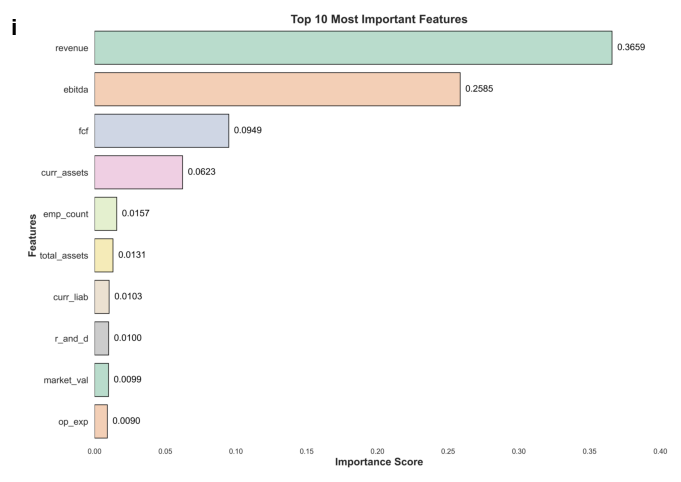

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the existing image
image_path = "feature_importance_top10_EU.png"  # Path to the existing image
img = mpimg.imread(image_path)

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Display the image
ax.imshow(img)
ax.axis('off')  # Turn off the axes

# Add a small title in the top-left corner
ax.text(
    -0.02, 0.98,  # Position: (x, y) in axes coordinates (0, 0 is bottom-left, 1, 1 is top-right)
    "i",  # The text for the small title
    fontsize=16,  # Font size
    fontweight='bold',  # Bold font
    fontfamily='Arial',  # Font family
    color='black',  # Text color
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Use axes coordinates for positioning
)

# Save the new image with the small title
new_image_path = "feature_importance_top10_EU_with_title.png"
plt.savefig(new_image_path, dpi=300, bbox_inches='tight')  # Save the new image

# Show the result
plt.show()

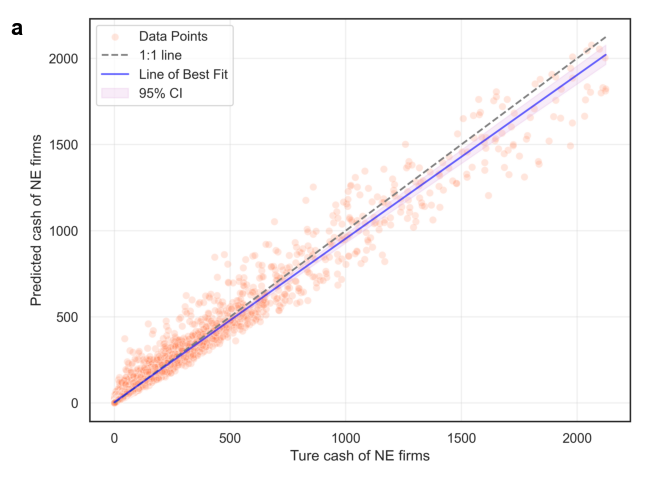

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the existing image
image_path = "rf_model_performance_train_NorthernEurope2.png"  # Path to the existing image
img = mpimg.imread(image_path)

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Display the image
ax.imshow(img)
ax.axis('off')  # Turn off the axes

# Add a small title in the top-left corner
ax.text(
    -0.02, 0.98,  # Position: (x, y) in axes coordinates (0, 0 is bottom-left, 1, 1 is top-right)
    "a",  # The text for the small title
    fontsize=16,  # Font size
    fontweight='bold',  # Bold font
    fontfamily='Arial',  # Font family
    color='black',  # Text color
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Use axes coordinates for positioning
)

# Save the new image with the small title
new_image_path = "rf_model_performance_train_NorthernEurope2_with_title.png"
plt.savefig(new_image_path, dpi=300, bbox_inches='tight')  # Save the new image

# Show the result
plt.show()

C:\Users\yuzhi\AppData\Local\Temp\ipykernel_19448\2724110922.py:63: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal', pad=0.05, aspect=40, shrink=0.6)


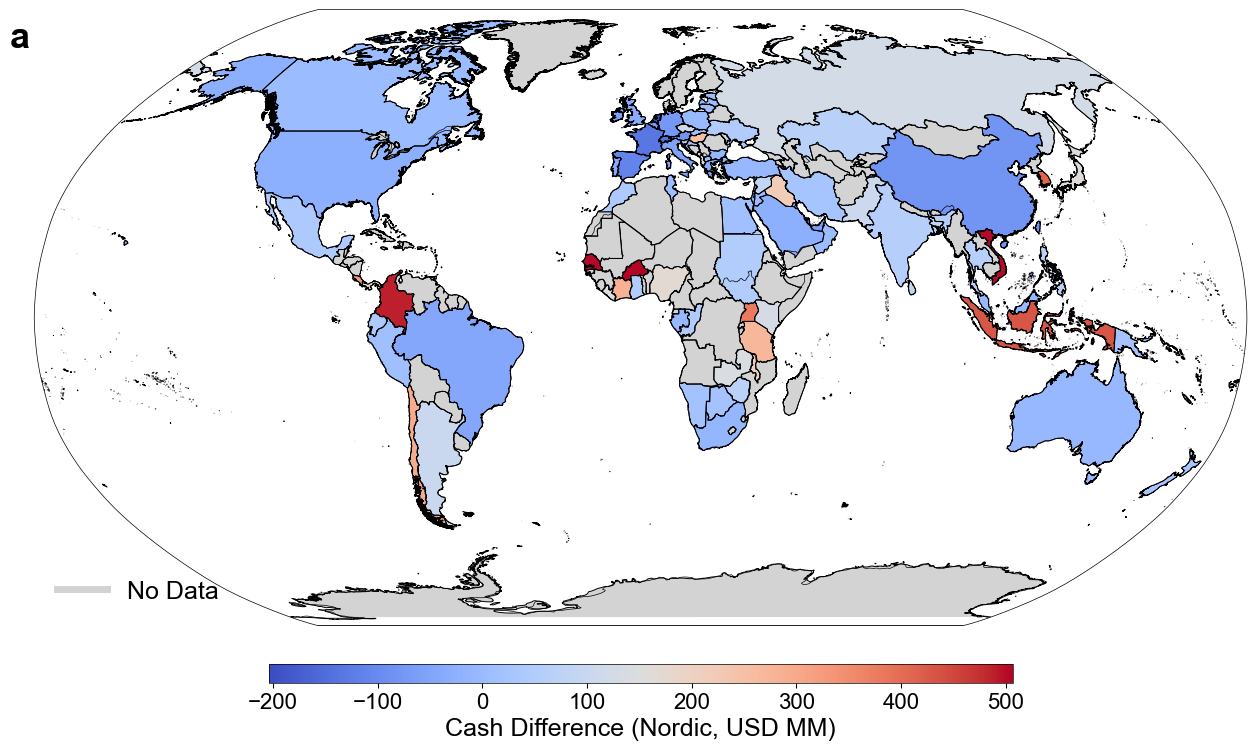

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Step 1: Load the shapefile
shapefile = 'world boundry/Global_country.shp'  # Ensure the path is correct
gdf = gpd.read_file(shapefile)

# Step 2: Load the merged_predictions.csv file
try:
    merged_df = pd.read_csv("merged_predictions.csv")
except FileNotFoundError:
    print("Error: merged_predictions.csv not found. Please make sure it is in the same directory as the script.")
    exit()

# Step 3: Calculate the average difEU for each country_short
# Group by 'country_short' and calculate the mean of 'difEU'
average_difEU = merged_df.groupby('country_short')['difEU'].mean().reset_index()

# Merge the average difEU back into the original DataFrame
merged_df = merged_df.drop(columns=['difEU'])  # Drop the original difEU column
merged_df = merged_df.merge(average_difEU, on='country_short', how='left')  # Add the averaged difEU column

# Step 4: Merge the shapefile GeoDataFrame with the CSV data
# Ensure the column names match for merging
# 'SOC' in the shapefile corresponds to 'country_short' in the CSV
gdf = gdf.rename(columns={'SOC': 'country_short'})  # Rename SOC to match the CSV column
merged_gdf = gdf.merge(merged_df[['country_short', 'difEU']].drop_duplicates(), on='country_short', how='left')

# Step 5: Set the CRS for the GeoDataFrame
if merged_gdf.crs is None:
    merged_gdf = merged_gdf.set_crs("EPSG:4326")  # Set CRS to WGS84 (latitude/longitude)

# Step 6: Plot the map with Robinson projection
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.Robinson())  # Use Robinson projection
ax.set_global()  # Set the map to display the entire globe

# Add features to the map
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')  # Add country borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')  # Add coastlines

# Step 7: Plot the data without the automatic legend
vmin = merged_gdf['difEU'].min()  # Minimum value in the difEU column
vmax = merged_gdf['difEU'].max()  # Maximum value in the difEU column
norm = Normalize(vmin=vmin, vmax=vmax)
merged_gdf.plot(column='difEU',  # Use difEU for coloring
                cmap='coolwarm',  # Color map for visualization
                ax=ax,
                transform=ccrs.PlateCarree(),  # Data is in PlateCarree projection
                missing_kwds={"color": "lightgrey", "label": "No Data"},  # Handle missing data
                edgecolor='black',  # Add country borders
                linewidth=0.7,
                norm=norm)  # Apply custom normalization

# Step 8: Add a custom colorbar
sm = ScalarMappable(cmap='coolwarm', norm=norm)
sm._A = []  # Dummy array for the colorbar
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.05, aspect=40, shrink=0.6)
cbar.set_label("Cash Difference (Nordic, USD MM)", fontsize=18)
# 修改色条刻度的字号
cbar.ax.tick_params(labelsize=16)  # 将刻度字号设置为12

# Step 9: Add a legend for missing data
missing_patch = plt.Line2D([0], [0], color="lightgrey", lw=5, label="No Data")
ax.legend(handles=[missing_patch], loc='lower left', fontsize=18, frameon=False)

# Step 10: Customize the map
#plt.title("(A) Global distribution of cash difference (Nordic)", fontsize=18, pad=20)
# Add a small title in the top-left corner
ax.text(
    -0.02, 0.98,  # Position: (x, y) in axes coordinates (0, 0 is bottom-left, 1, 1 is top-right)
    "a",  # The text for the small title
    fontsize=26,  # Font size
    fontweight='bold',  # Bold font
    fontfamily='Arial',  # Font family
    color='black',  # Text color
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Use axes coordinates for positioning
)

# Step 11: Save the map as a high-resolution image
plt.savefig("global_difEU_distribution_robinson_Nordic.png", dpi=400, bbox_inches='tight')  # Save as 400 DPI PNG file

# Step 12: Show the map
plt.show()

C:\Users\yuzhi\AppData\Local\Temp\ipykernel_19448\1943692958.py:65: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal', pad=0.05, aspect=40, shrink=0.6)


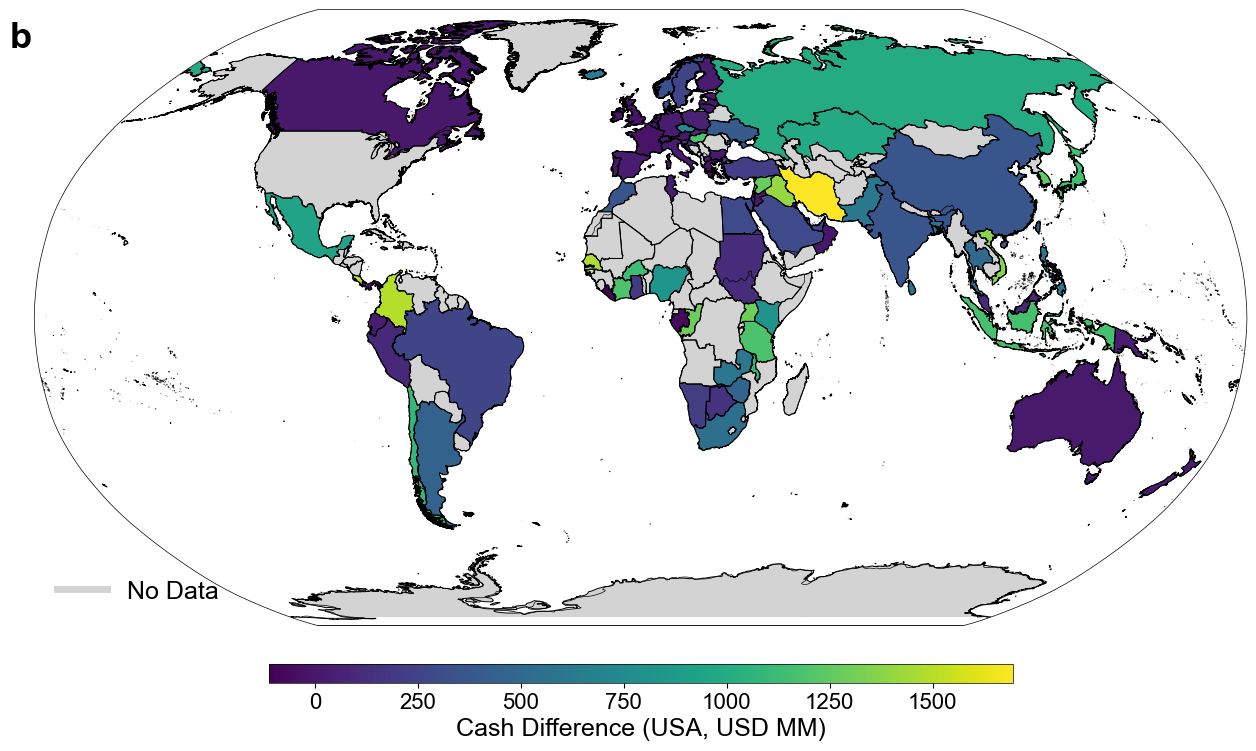

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# Set font to Times New Roman globally
plt.rcParams['font.family'] = 'Arial'

# Step 1: Load the shapefile
shapefile = 'world boundry/Global_country.shp'  # Ensure the path is correct
gdf = gpd.read_file(shapefile)

# Step 2: Load the merged_predictions.csv file
try:
    merged_df = pd.read_csv("merged_predictions.csv")
except FileNotFoundError:
    print("Error: merged_predictions.csv not found. Please make sure it is in the same directory as the script.")
    exit()

# Step 3: Calculate the average difEU for each country_short
# Group by 'country_short' and calculate the mean of 'difEU'
average_difEU = merged_df.groupby('country_short')['difUSA'].mean().reset_index()

# Merge the average difEU back into the original DataFrame
merged_df = merged_df.drop(columns=['difUSA'])  # Drop the original difEU column
merged_df = merged_df.merge(average_difEU, on='country_short', how='left')  # Add the averaged difEU column

# Step 4: Merge the shapefile GeoDataFrame with the CSV data
# Ensure the column names match for merging
# 'SOC' in the shapefile corresponds to 'country_short' in the CSV
gdf = gdf.rename(columns={'SOC': 'country_short'})  # Rename SOC to match the CSV column
merged_gdf = gdf.merge(merged_df[['country_short', 'difUSA']].drop_duplicates(), on='country_short', how='left')

# Step 5: Set the CRS for the GeoDataFrame
if merged_gdf.crs is None:
    merged_gdf = merged_gdf.set_crs("EPSG:4326")  # Set CRS to WGS84 (latitude/longitude)

# Step 6: Plot the map with Robinson projection
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.Robinson())  # Use Robinson projection
ax.set_global()  # Set the map to display the entire globe

# Add features to the map
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')  # Add country borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')  # Add coastlines

# Step 7: Plot the data without the automatic legend
vmin = merged_gdf['difUSA'].min()  # Minimum value in the difEU column
vmax = merged_gdf['difUSA'].max()  # Maximum value in the difEU column
norm = Normalize(vmin=vmin, vmax=vmax)
merged_gdf.plot(column='difUSA',  # Use difEU for coloring
                cmap='viridis',  # Color map for visualization
                ax=ax,
                transform=ccrs.PlateCarree(),  # Data is in PlateCarree projection
                missing_kwds={"color": "lightgrey", "label": "No Data"},  # Handle missing data
                edgecolor='black',  # Add country borders
                linewidth=0.7,
                norm=norm)  # Apply custom normalization

# Step 8: Add a custom colorbar
sm = ScalarMappable(cmap='viridis', norm=norm)
sm._A = []  # Dummy array for the colorbar
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.05, aspect=40, shrink=0.6)
cbar.set_label("Cash Difference (USA, USD MM)", fontsize=18)
# 修改色条刻度的字号
cbar.ax.tick_params(labelsize=16)  # 将刻度字号设置为12

# Step 9: Add a legend for missing data
missing_patch = plt.Line2D([0], [0], color="lightgrey", lw=5, label="No Data")
ax.legend(handles=[missing_patch], loc='lower left', fontsize=18, frameon=False)

# Step 10: Customize the map
#plt.title("(B) Global distribution of cash difference (USA)", fontsize=18, pad=20)
# Add a small title in the top-left corner
ax.text(
    -0.02, 0.98,  # Position: (x, y) in axes coordinates (0, 0 is bottom-left, 1, 1 is top-right)
    "b",  # The text for the small title
    fontsize=26,  # Font size
    fontweight='bold',  # Bold font
    fontfamily='Arial',  # Font family
    color='black',  # Text color
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Use axes coordinates for positioning
)

# Step 11: Save the map as a high-resolution image
plt.savefig("global_difEU_distribution_robinson_USA.png", dpi=400, bbox_inches='tight')  # Save as 400 DPI PNG file

# Step 12: Show the map
plt.show()

In [11]:
from PIL import Image

# Define the image file paths (4 images in total)
images = [
    "global_difEU_distribution_robinson_Nordic.png",
    "global_difEU_distribution_robinson_USA.png",
    "yearly_trends_with_confidence_intervals.png",
    "region_difEU_difUSA_with_error_bars.png"
]

# Load all images
loaded_images = [Image.open(img) for img in images]

# Find the maximum width and height among all images
max_width = max(img.width for img in loaded_images)
max_height = max(img.height for img in loaded_images)

# Resize all images to the same width and height
resized_images = [img.resize((max_width, max_height)) for img in loaded_images]

# Determine the total width and height for the canvas
total_width = max_width * 2  # Two images per row
total_height = max_height * 2  # Two rows

# Create a blank canvas for the final image
combined_image = Image.new("RGB", (total_width, total_height), "white")

# Paste the images into the canvas
for i, img in enumerate(resized_images):
    x_offset = (i % 2) * max_width  # Column position (0 or 1)
    y_offset = (i // 2) * max_height  # Row position (0 or 1)
    combined_image.paste(img, (x_offset, y_offset))

# Save the final combined image
combined_image.save("combined_image_2x2_fixed.png", dpi=(400, 400))

# Show the final image (optional)
combined_image.show()

In [24]:
from PIL import Image

# Define the image file paths (4 images in total)
images = [
    "rf_model_performance_train_NorthernEurope2_with_title.png",
    "rf_model_performance_valid_NorthernEurope2_with_title.png",
    "rf_model_performance_train_USA_with_title.png",
    "rf_model_performance_valid_USA_with_title.png"
]

# Load all images
loaded_images = [Image.open(img) for img in images]

# Find the maximum width and height among all images
max_width = max(img.width for img in loaded_images)
max_height = max(img.height for img in loaded_images)

# Resize all images to the same width and height
resized_images = [img.resize((max_width, max_height)) for img in loaded_images]

# Determine the total width and height for the canvas
total_width = max_width * 2  # Two images per row
total_height = max_height * 2  # Two rows

# Create a blank canvas for the final image
combined_image = Image.new("RGB", (total_width, total_height), "white")

# Paste the images into the canvas
for i, img in enumerate(resized_images):
    x_offset = (i % 2) * max_width  # Column position (0 or 1)
    y_offset = (i // 2) * max_height  # Row position (0 or 1)
    combined_image.paste(img, (x_offset, y_offset))

# Save the final combined image
combined_image.save("combined_image_2x2_appendix.png", dpi=(400, 400))

# Show the final image (optional)
combined_image.show()

In [1]:
import pandas as pd

# Load data
df = pd.read_csv('annual_climate_shocks_1990-2023.csv')

# Calculate yearly averages
yearly_avg = df.groupby('Year')[['tmmn_pos_num', 'tmmn_neg_num', 'pr_pos_num', 'pr_neg_num']].mean().reset_index()

# Display as a table
print(yearly_avg.to_string(index=False))

# Save to CSV for reference
yearly_avg.to_csv('yearly_climate_shock_averages.csv', index=False)

 Year  tmmn_pos_num  tmmn_neg_num  pr_pos_num  pr_neg_num
 1990      3.701796      0.492216    2.151377    1.420120
 1991      3.187545      1.022275    1.596407    1.538204
 1992      2.620838      1.548503    1.817964    1.575569
 1993      2.295808      1.519281    1.845030    1.505629
 1994      3.949701      0.745150    1.790898    1.427305
 1995      3.211976      0.832814    1.876168    1.542515
 1996      2.166228      1.679760    1.916168    1.494611
 1997      2.800479      1.455329    1.987545    1.708982
 1998      5.273054      0.489341    2.367186    1.402635
 1999      3.455329      0.729581    1.828024    1.415329
 2000      3.282395      0.848862    1.791377    1.592335
 2001      3.442635      0.777006    1.810060    1.627545
 2002      4.107305      0.763832    1.946108    1.551138
 2003      3.240000      0.803114    1.650060    1.688383
 2004      2.571257      0.590419    1.835689    1.355210
 2005      3.163593      0.871138    1.565749    1.414850
 2006      3.7